In [1]:
# Load packages
library(tidyverse)
library(rjags)
library(R2jags)
## create an identifier for the output and figures:
runnum = 0

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot




In [2]:
devtools::load_all()

ℹ Loading CPModel



In [3]:
dat<-read_csv(paste0("data/Mallorca.csv"))

Rows: 133 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): year, y, y_error, year_error


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
include_errors = TRUE

[1] 0
Plot of raw data saved to figure folder 


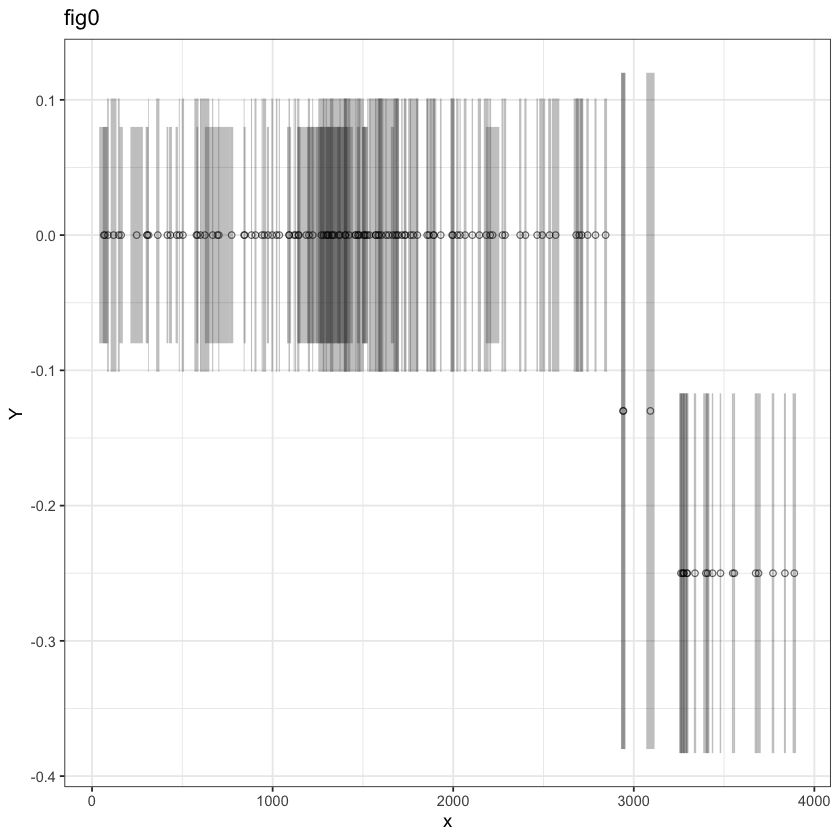

In [5]:
## Plot the data with 1-sigma uncertainty
plot_data(dat, paste0('output',runnum),runnum=runnum,
          include_errors = include_errors)

In [6]:
num_change_points <- 2

In [7]:
RunCPModel(dat=dat,
            runnum = runnum,
            n_cp = num_change_points,
            include_errors = include_errors,
            useriter=40000,
            userburnin=15000,
            userthin=15,             
            userchainnum=4)
#             userburnin=1000,) 
#          runnum = runnum)

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 266
   Unobserved stochastic nodes: 140
   Total graph size: 52080

Initializing model

MCMC output saved to output folder 


In [10]:
## Check convergence, if convergence is ok then a summary of the parameters will print
get_diagnostics(dat, runnum = runnum,
                n_cp = num_change_points)

[1] 0
Rhat looks good, no  convergence issues indicated for checked parameters 
No apparent autocorrelation issues for checked parameters. 
The accuracy of the parameter estimation is adequate. 


$pars.checked
[1] "beta[1]"   "beta[2]"   "beta[3]"   "alpha[1]"  "alpha[2]"  "cp[1]"    
[7] "cp[2]"     "sigma_err"

$DIC
[1] -1142.716

In [11]:
# If diagnostics look ok, get estimates of the parameters
# returns mean estimate, sd and quantiles
# beta = rate of change (slope)
# cp = change point
pars.summary = get_ests(dat, runnum=runnum,
         n_cp = num_change_points)
pars.summary

,mean,sd,l95,u95,l90,u90,l67,u67,l50,u50
beta[1],1.257286e-08,1.280992e-05,-2.472856e-05,2.527074e-05,-2.081377e-05,2.139201e-05,-1.248004e-05,1.235796e-05,-8.785968e-06,8.690150e-06
beta[2],-5.399531e-04,1.559742e-04,-9.070526e-04,-3.027708e-04,-8.265177e-04,-3.290597e-04,-6.806040e-04,-3.975326e-04,-6.276442e-04,-4.300116e-04
beta[3],4.566920e-05,1.830432e-04,-2.971508e-04,4.213332e-04,-2.433686e-04,3.548154e-04,-1.302745e-04,2.169938e-04,-7.841436e-05,1.600830e-04
cp[1],2.813340e+03,7.690807e+01,2.685256e+03,2.944328e+03,2.693272e+03,2.935639e+03,2.726431e+03,2.902977e+03,2.748136e+03,2.877968e+03
cp[2],3.326224e+03,7.250673e+01,3.202513e+03,3.445114e+03,3.210206e+03,3.437747e+03,3.241494e+03,3.408353e+03,3.264798e+03,3.389026e+03


[1] 0
Plot of estimates saved to figure folder 


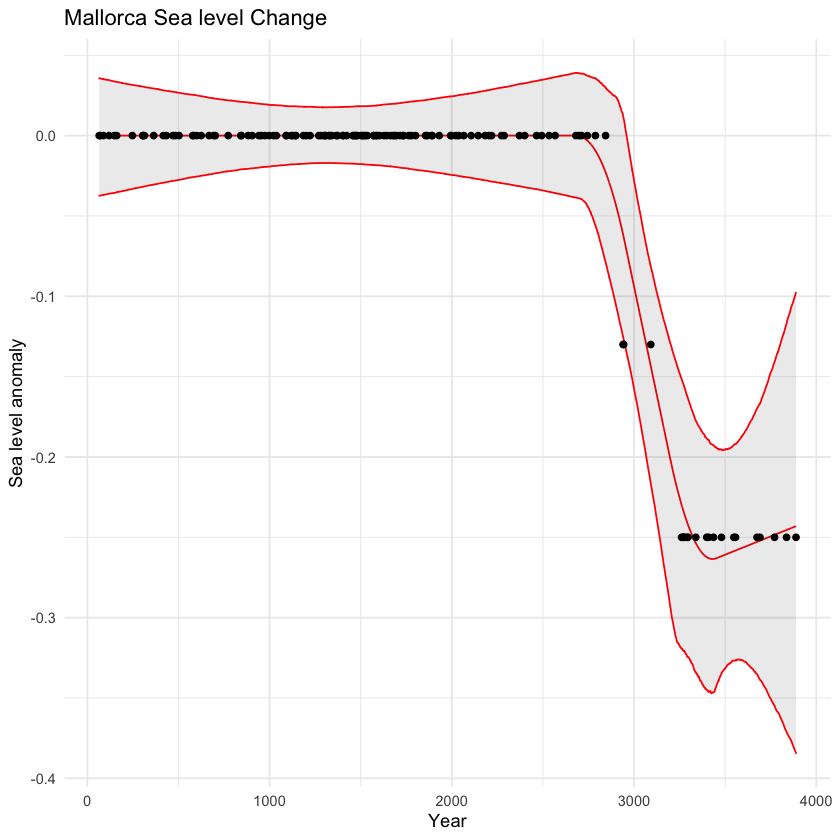

In [12]:
## Plot results
p <- plot_res(dat,runnum=runnum,
         n_cp = num_change_points,
         yaxis.lab="Sea level anomaly",
         title="Mallorca Sea level Change")
# get the plot
p$p_res

In [110]:
# Load jags data
load(paste0("output",runnum,"/jags_mod2.Rdata"))
load(paste0("output",runnum,"/jags_data.Rdata"))

# Get posterior samples
sstar_s<-mod$BUGSoutput$sims.list$s_star
# Get estimates and uncertainty bounds
sstar_mean<-apply(sstar_s,2,mean)
sstar_median<-apply(sstar_s,2,median)
sstar_upr95<-apply(sstar_s,2,quantile,probs=0.025)
sstar_lwr95<-apply(sstar_s,2,quantile,probs=0.975)
sstar_upr90<-apply(sstar_s,2,quantile,probs=0.05)
sstar_lwr90<-apply(sstar_s,2,quantile,probs=0.95)
sstar_upr67<-apply(sstar_s,2,quantile,probs=0.83333)
sstar_lwr67<-apply(sstar_s,2,quantile,probs=0.16667)
sstar_upr50<-apply(sstar_s,2,quantile,probs=0.75)
sstar_lwr50<-apply(sstar_s,2,quantile,probs=0.25)
# Create data frame for plotting

df.s<-data.frame(sstar_mean,sstar_median,sstar_upr95,sstar_lwr95,sstar_upr90,sstar_lwr90,sstar_upr67,sstar_lwr67,sstar_upr50,sstar_lwr50,jags_data$year.t*1000)
names(df.s)<-c("Y_mean","Y_median","upr95","lwr95","upr90","lwr90","upr67","lwr67","upr50","lwr50","Year")

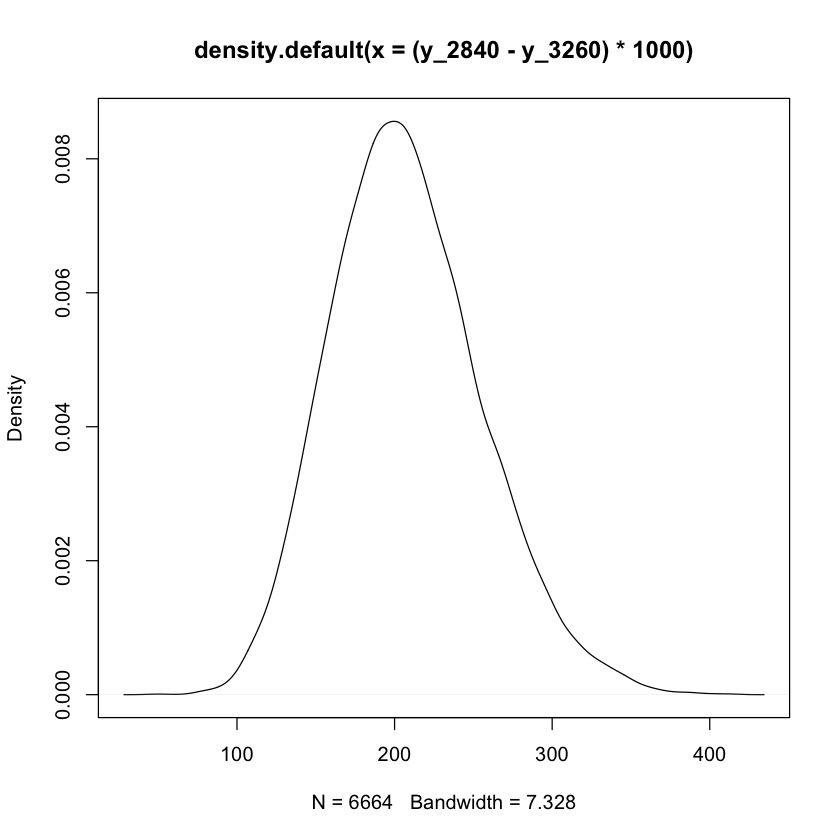

In [111]:
# find the distribution of the difference in RSL between 3260 BP and 2840 BP (in millimeters):
y_2840=sstar_s[,2776]
y_3260=sstar_s[,3196]

ds = plot(density((y_2840-y_3260)*1000))
q_2840_3260 = 0
q_2840_3260[1]=quantile(y_2840-y_3260,probs=0.025)*1000
q_2840_3260[2]=quantile(y_2840-y_3260,probs=0.05)*1000
q_2840_3260[3]=quantile(y_2840-y_3260,probs=0.1667)*1000
q_2840_3260[4]=quantile(y_2840-y_3260,probs=0.25)*1000
q_2840_3260[5]=quantile(y_2840-y_3260,probs=0.333)*1000
q_2840_3260[6]=median(y_2840-y_3260)*1000
q_2840_3260[7]=quantile(y_2840-y_3260,probs=0.667)*1000
q_2840_3260[8]=quantile(y_2840-y_3260,probs=0.75)*1000
q_2840_3260[9]=quantile(y_2840-y_3260,probs=0.8333)*1000
q_2840_3260[10]=quantile(y_2840-y_3260,probs=0.95)*1000
q_2840_3260[11]=quantile(y_2840-y_3260,probs=0.975)*1000
write.csv(q_2840_3260, paste0("output",runnum,"/quantiles_2840_3260.csv"))


In [112]:
# create pdf of the jump in RSL from 3260 to 2840
pdf(file = paste0("output",runnum,"/Difference_Distribution_3260_2840.pdf"),
    width = 7, 
    height = 6)
ds = plot(density(y_2840-y_3260))
dev.off()

pdf 
  2

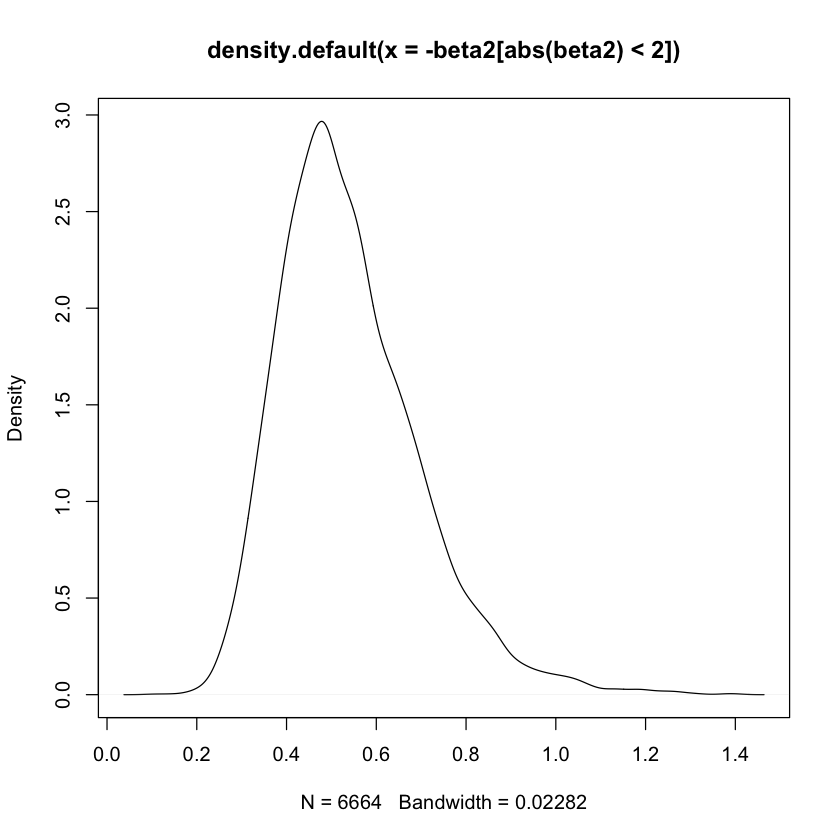

In [113]:
betas<-mod$BUGSoutput$sims.list$beta
# Get estimate of the rate of change in the middle section of time series and its posterior distribution (mm/yr)
beta02 = betas[ ,2]
beta2=beta02

quantB = 0
quantB[1]=quantile(beta2[abs(beta2)<3],probs=0.025)
quantB[2]=quantile(beta2[abs(beta2)<3],probs=0.05)
quantB[3]=quantile(beta2[abs(beta2)<3],probs=0.1667)
quantB[4]=quantile(beta2[abs(beta2)<3],probs=0.25)
quantB[5]=quantile(beta2[abs(beta2)<3],probs=0.333)
quantB[6]=quantile(beta2[abs(beta2)<3],probs=0.5)
quantB[7]=quantile(beta2[abs(beta2)<3],probs=0.6667)
quantB[8]=quantile(beta2[abs(beta2)<3],probs=0.75)
quantB[9]=quantile(beta2[abs(beta2)<3],probs=0.83)
quantB[10]=quantile(beta2[abs(beta2)<3],probs=0.95)
quantB[11]=quantile(beta2[abs(beta2)<3],probs=0.975)
write.csv(quantB, paste0("output",runnum,"/quantiles_", runnum, "_Rate_of_jump.csv"))
ds = plot(density(-beta2[abs(beta2)<2]))

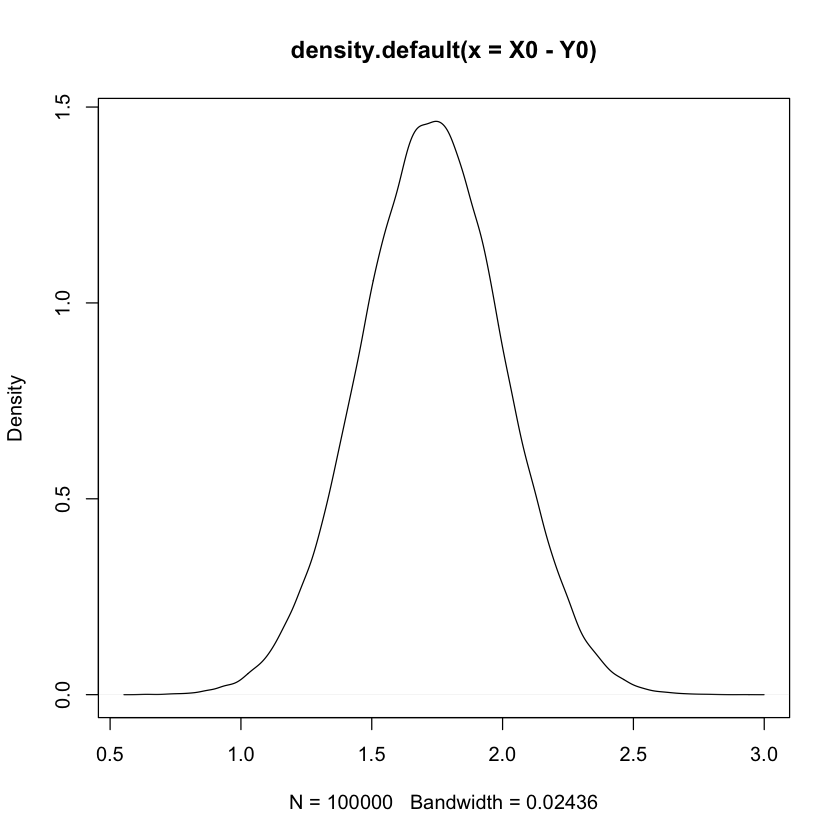

In [129]:
## for the rate from 2800 to present:
beta01 = betas[ ,1]
beta1=beta01

Y0 = sample(-beta1, 100000, replace = TRUE, prob = NULL) # rate for the past ~2800 years
X0 = rnorm(100000, 1.73, .2705) # rate of GMSL change from IPCC AR6

ds = plot(density(X0-Y0))
quant = 0
quant[1]=quantile(X0-Y0,probs=0.025)*1000
quant[2]=quantile(X0-Y0,probs=0.05)*1000
quant[3]=quantile(X0-Y0,probs=0.1667)*1000
quant[4]=quantile(X0-Y0,probs=0.25)*1000
quant[5]=quantile(X0-Y0,probs=0.333)*1000
quant[6]=median(X0-Y0)*1000
quant[7]=quantile(X0-Y0,probs=0.667)*1000
quant[8]=quantile(X0-Y0,probs=0.75)*1000
quant[9]=quantile(X0-Y0,probs=0.8333)*1000
quant[10]=quantile(X0-Y0,probs=0.95)*1000
quant[11]=quantile(X0-Y0,probs=0.975)*1000

write.csv(quant, paste0("output",runnum,"/Quantiles_RateDiff_1900.csv"))

In [115]:
# create plot of the difference in the GMSL rate for the past ~120 years compared to ~2800 BP to 1900
pdf(file = paste0('output', runnum, '/Rate_Diff_Dist_1900.pdf'), 
    width = 7, 
    height = 6) 
Rate_Difference = X0-Y0
ds = plot(density(Rate_Difference))
dev.off()

pdf 
  2

In [116]:
# create plot of the rate of RSL change from ~2800 BP to present
pdf(file = paste0("output",runnum,'/Historical Rate Dist.pdf'),   
    width = 7, 
    height = 6) 
ds = plot(density(-beta1))
dev.off()

pdf 
  2

In [117]:
# compare to the distribution of rate of GMSL sea level change to the historical rate (~2800 BP to present):
pdf(file = paste0("output",runnum,'/Histogram_Rate_from_2800_current.pdf'),   
    width = 7, 
    height = 6) 
Rate_From_2800_To_Present = -beta1
cur_rate = rnorm(3332, 1.73, .2705)
p4 = hist(cur_rate, breaks = seq(-0.1, 2.8, length.out = 30), plot = FALSE)
p5 = hist(Rate_From_2800_To_Present, breaks = seq(-0.5, 3, length.out = 200), plot = FALSE)

plot( p5, col=rgb(0,0,1,1/4), xlim=c(-0.1,2.7),main = paste("Histograms of Past and Current Rates") ) 
plot( p4, col=rgb(1,0,0,1/4), xlim=c(-0.1,2.7), add=T) 
dev.off()

pdf 
  2

In [118]:
# compare to the distribution of rate of GMSL change over past ~120 years to period of greatest rise in Mallorca.
pdf(file = paste0("output",runnum,'/Rate_3200_to_2800.pdf'),   
    width = 7, 
    height = 6) 

Rate_from_3200_to_2800 = -beta2
Y0 = sample(Rate_from_3200_to_2800, 100000, replace = TRUE, prob = NULL)
X0 = rnorm(100000, 1.73, .2705)

ds = plot(density(X0-Y0))
mean(X0-Y0)

quant = 0
quant[1]=quantile(X0-Y0,probs=0.025)*1000
quant[2]=quantile(X0-Y0,probs=0.05)*1000
quant[3]=quantile(X0-Y0,probs=0.1667)*1000
quant[4]=quantile(X0-Y0,probs=0.25)*1000
quant[5]=quantile(X0-Y0,probs=0.333)*1000
quant[6]=median(X0-Y0)*1000
quant[7]=quantile(X0-Y0,probs=0.667)*1000
quant[8]=quantile(X0-Y0,probs=0.75)*1000
quant[9]=quantile(X0-Y0,probs=0.8333)*1000
quant[10]=quantile(X0-Y0,probs=0.95)*1000
quant[11]=quantile(X0-Y0,probs=0.975)*1000
write.csv(quant, paste0("output",runnum,"/Diff_Rate_2800_3200.csv"))

P = ecdf(X0-Y0)   # define CDF of current rate of GMSL change  minus  the rate of RSL change in Mallorca from ~3200 to ~2800 

# Now find the probability that current > jump or that X0 - Y0 is less than 0 mm/yr
# Uses sampling, so results may slightly vary from run to run.  Should be ~ 0.00024
paste("Posterior prob that current GMSL rise is < RSL change in Mallorca between ~3200 and ~2800 BP =", P(0.0))

dev.off()

[1] 1.191019

[1] "Posterior prob that current GMSL rise is < RSL change in Mallorca between ~3200 and ~2800 BP = 0.00021"

pdf 
  2

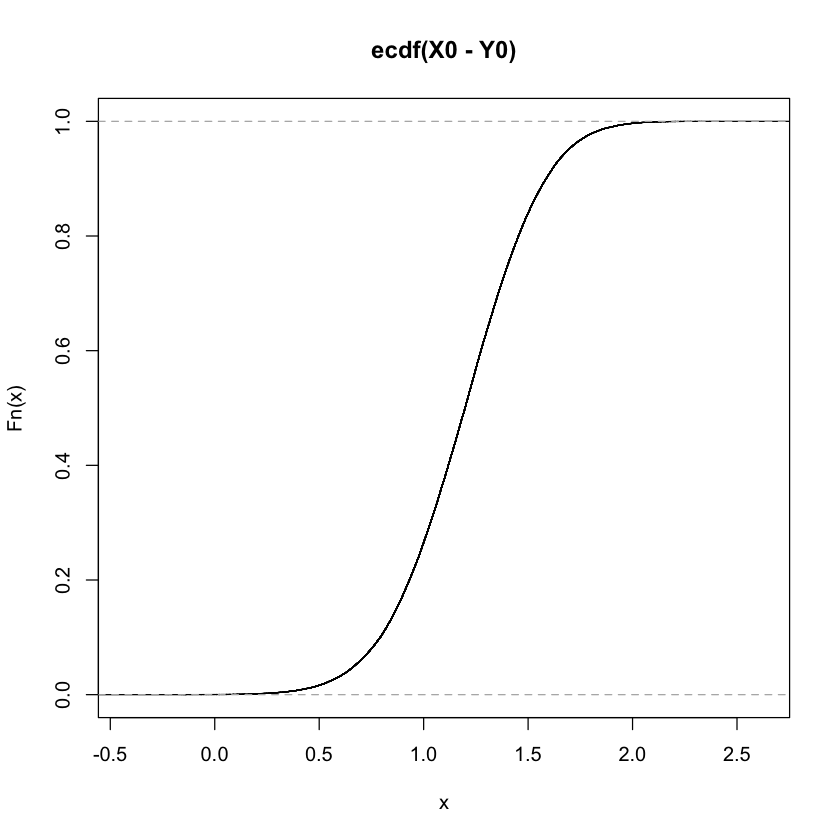

In [119]:
# plot CDF, which estimates the posterior probability that rate current rate of change in GMSL 
# is 'x' mm/yr greater than the rate of RSL change in Mallorca from ~3200 to ~2800 
plot(P)      

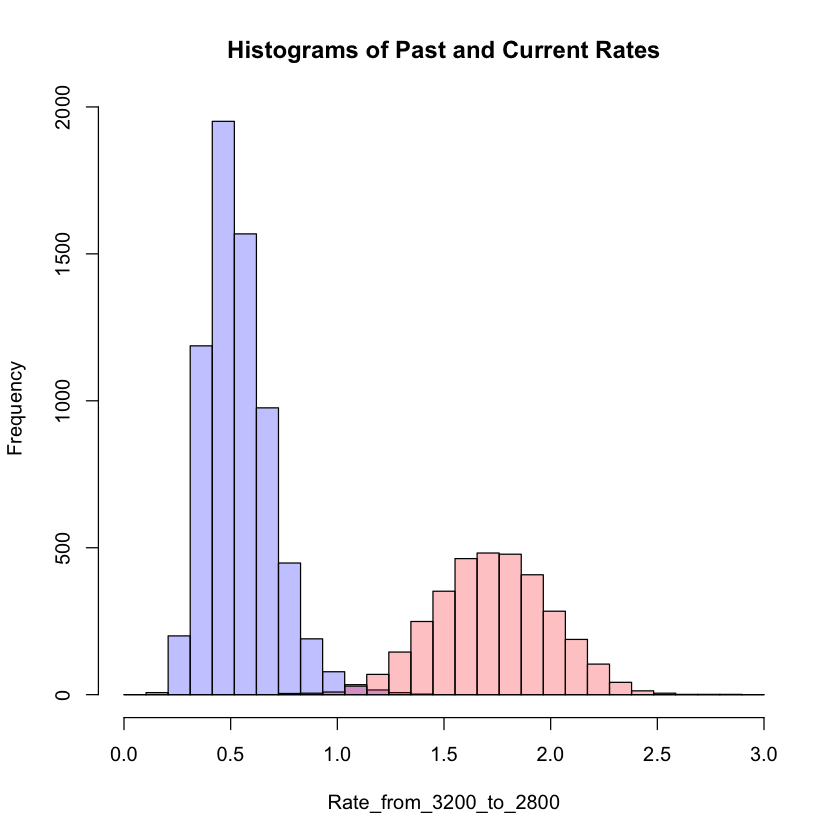

In [120]:
# plot histograms of the posterior distributions of the two rates
cur_rate = rnorm(3332, 1.73, .2705) # current change in GMSL
p4 = hist(cur_rate, breaks = seq(0, 3, length.out = 30), plot = FALSE)
p5 = hist(Rate_from_3200_to_2800, breaks = seq(0, 3, length.out = 30), plot = FALSE)

plot( p5, col=rgb(0,0,1,1/4), xlim=c(0,3),main = paste("Histograms of Past and Current Rates") ) 
plot( p4, col=rgb(1,0,0,1/4), xlim=c(0,3), add=T) 

In [121]:
# plot densities of the posterior distributions of the two rates
pdf(file = paste0("output",runnum,"/Density_Rate_since_28_vs_present.pdf"),   
    width = 7, 
    height = 6) 

plot(density(cur_rate),xlim=c(-0.1,2.7),ylim=c(0,33),col=rgb(1,0,0))
lines(density(Rate_From_2800_To_Present), col=rgb(0,0,1))

dev.off()

pdf 
  2

In [122]:
# plot CDF of difference between current GMSL rate and the rate of RSL change in Mallorca from ~3200 to ~2800 
pdf(file =  paste0("output",runnum,"/CDF_Diff_Rate_3200_to_2800.pdf"),   
    width = 7, 
    height = 6) 
P = ecdf(X0-Y0)   # P is a function giving the empirical CDF of the difference in rates
plot(P)           # Draws a plot of the empirical CDF
dev.off()

pdf 
  2

In [123]:
# probability density of current rate of GMSL change and the rate of RSL change in Mallorca from ~3200 to ~2800 
pdf(file = paste0("output",runnum,'/Density_Rate_3200_to_2800_Differences.pdf'),  
    width = 7, 
    height = 6)

plot(density(cur_rate),xlim = c(0,3),ylim=c(0,3.2),col=rgb(1,0,0))
lines(density(Rate_from_3200_to_2800), col=rgb(0,0,1))
dev.off()

pdf 
  2

In [124]:
# compare to the distribution of current sea level rate to past:
pdf(file = paste0("output",runnum,'/Histograms_JumpRate_Current.pdf'),   # The directory you want to save the file in
    width = 7, # The width of the plot in inches
    height = 6) # The height of the plot in inches

cur_rate = rnorm(3332, 1.73, .2705)
p4 = hist(cur_rate, breaks = seq(0, 3, length.out = 30), plot = FALSE)
          #c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.3,0.4)
p5 = hist(Rate_from_3200_to_2800, breaks = seq(0, 3, length.out = 30), plot = FALSE)

plot( p5, col=rgb(0,0,1,1/4), xlim=c(0,3),main = paste("Histograms of Past and Current Rates") ) # second
plot( p4, col=rgb(1,0,0,1/4), xlim=c(0,3), add=T)  # first histogram
dev.off()


pdf 
  2

In [125]:
# find the largest 400-year period jump
numruns <- c(-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7)
difs <- 0
count <- 0
for (val in numruns) {
X0 = sample(sstar_s[ ,2850+val*10], 100000, replace = TRUE, prob = NULL)
Y0 = sample(sstar_s[ ,3250+val*10], 100000, replace = TRUE, prob = NULL)
difs[val-min(numruns)+1]=mean(X0-Y0)
}
best = which(difs==max(difs))
bestyears = numruns[best]*10+2850

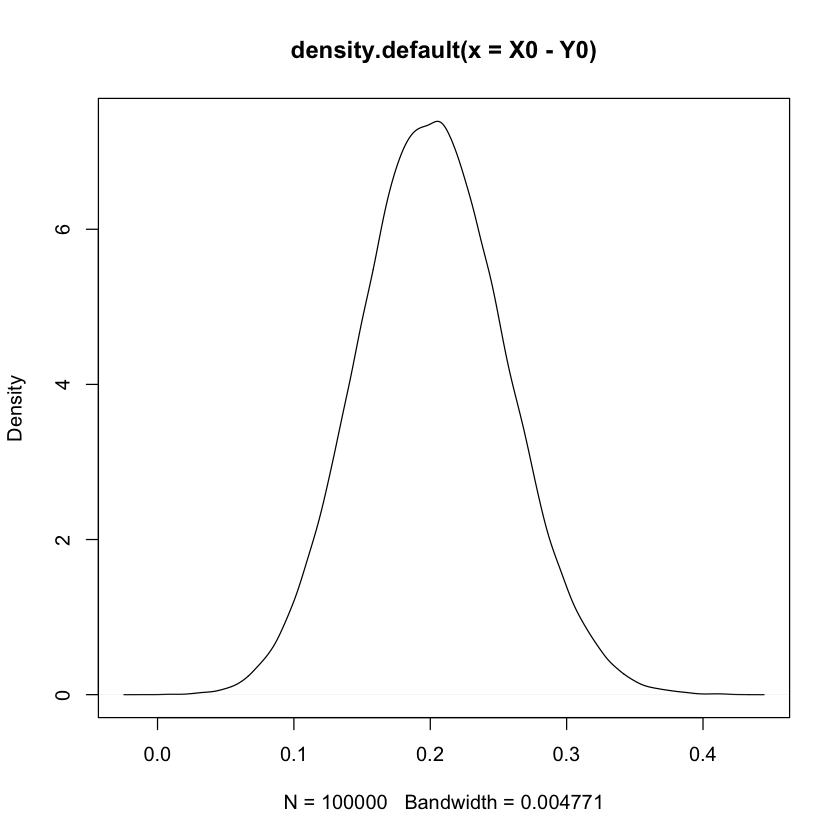

In [126]:
# create the distribution of RSL jump for the largest 400-year period
X0 = sample(sstar_s[ ,bestyears], 100000, replace = TRUE, prob = NULL)
Y0 = sample(sstar_s[ ,bestyears+400], 100000, replace = TRUE, prob = NULL)

ds = plot(density(X0-Y0))

quant = 0
quant[1]=quantile(X0-Y0,probs=0.025)*1000
quant[2]=quantile(X0-Y0,probs=0.05)*1000
quant[3]=quantile(X0-Y0,probs=0.1667)*1000
quant[4]=quantile(X0-Y0,probs=0.25)*1000
quant[5]=quantile(X0-Y0,probs=0.333)*1000
quant[6]=median(X0-Y0)*1000
quant[7]=quantile(X0-Y0,probs=0.667)*1000
quant[8]=quantile(X0-Y0,probs=0.75)*1000
quant[9]=quantile(X0-Y0,probs=0.8333)*1000
quant[10]=quantile(X0-Y0,probs=0.95)*1000
quant[11]=quantile(X0-Y0,probs=0.975)*1000

write.csv(quant, paste0("output",runnum,"/quantiles", runnum, "best_", bestyears, ".csv"))

In [127]:
pdf(file = paste0('output', runnum, '/sampled_RSL_change_for_', bestyears, '.pdf'),   
    width = 7, 
    height = 6) 
plot(density(X0-Y0))
dev.off()

pdf 
  2

In [128]:
# create file for posterior distribution of RSL over time
write.csv(df.s, paste0("output",runnum,"/RSL_posterior.csv"))
write.csv(pars.summary, paste0("output",runnum,"/Parameter_Summary.csv"))